# Reconocimiento de señales de tráfico
### Máster Universitario en Ingeniería computacional y matemática - Área de inteligencia artificial
### Antonio González Hidalgo (agonzalezhidalgo@uoc.edu)

Usando una red neuronal densamente conectada.

Para la correcta funcionamiento de este notebook, el notebook debe de estar estructurado de la siguiente manera:

- ./dataset
- ./dataset/labels.csv Fichero que contiene los nombres de las señales correspondientes.
- ./dataset/train      Conjunto de imágenes que formarán el entrenamiento de la red neuronal.
- ./dataset/test       Conjunto de imágenes que constituirán el test.

Este notebook se ha ejecutado usando el dataset de _BelgiumTS_
https://btsd.ethz.ch/shareddata/

In [1]:
import import_ipynb
import tfm_generic_functions as traffic

# https://docs.python.org/3/library/os.html
import os

# https://docs.scipy.org/doc/numpy/reference/
import numpy as np

# https://keras.io/models/model/
import keras

# https://keras.io/models/sequential/
from keras.models import Sequential

importing Jupyter notebook from tfm_generic_functions.ipynb


Using TensorFlow backend.


In [2]:
# Obtenemos el directorio actual como trabajo.
ROOT_PATH = os.getcwd()

# Establecemos la dimensión de las imágenes.
IMG_SHAPE = (64, 64)
print("Tamaño de las imágenes de entrada: ", IMG_SHAPE)
IMG_SHAPE_LEN = IMG_SHAPE[0] * IMG_SHAPE[1]
print("Vectorizando la entrada, sería de un tamaño: ", IMG_SHAPE_LEN)

# Obtenemos los paths de trabajo
labels_path = os.path.join(ROOT_PATH, "dataset_bel/labels.csv")
train_path = os.path.join(ROOT_PATH, "dataset_bel/train")
test_path = os.path.join(ROOT_PATH, "dataset_bel/test")

Tamaño de las imágenes de entrada:  (64, 64)
Vectorizando la entrada, sería de un tamaño:  4096


In [3]:
# Cargamos las imágenes de entrenamiento y de test.
images_train, labels_train = traffic.readDataset(train_path, IMG_SHAPE, True)
images_test, labels_test = traffic.readDataset(test_path, IMG_SHAPE, True)

# Convertimos las listas a array numpy de float32
np_images_train = np.asarray(images_train, dtype = np.float32)
np_labels_train = np.asarray(labels_train, dtype = np.int8)

np_images_test = np.asarray(images_test, dtype = np.float32)
np_labels_test = np.asarray(labels_test, dtype = np.int8)

# Recuperamos los nombres de las categorias. Los diferentes tipo de señales
# que se van a clasificar.
titles = traffic.read_csv(labels_path, ",")

# Se imprime información de los datos cargados.
traffic.print_size_dataset(images_train, labels_train, np_images_train, np_labels_train, "train")
traffic.print_size_dataset(images_test, labels_test, np_images_test, np_labels_test, "test")
print("Titles total: ", len(titles))

Total images (train):  4575
Total labels (train):  62
Images shape:  (4575, 64, 64)
Labels shape:  (4575,)
Total images (test):  2520
Total labels (test):  53
Images shape:  (2520, 64, 64)
Labels shape:  (2520,)
Titles total:  62


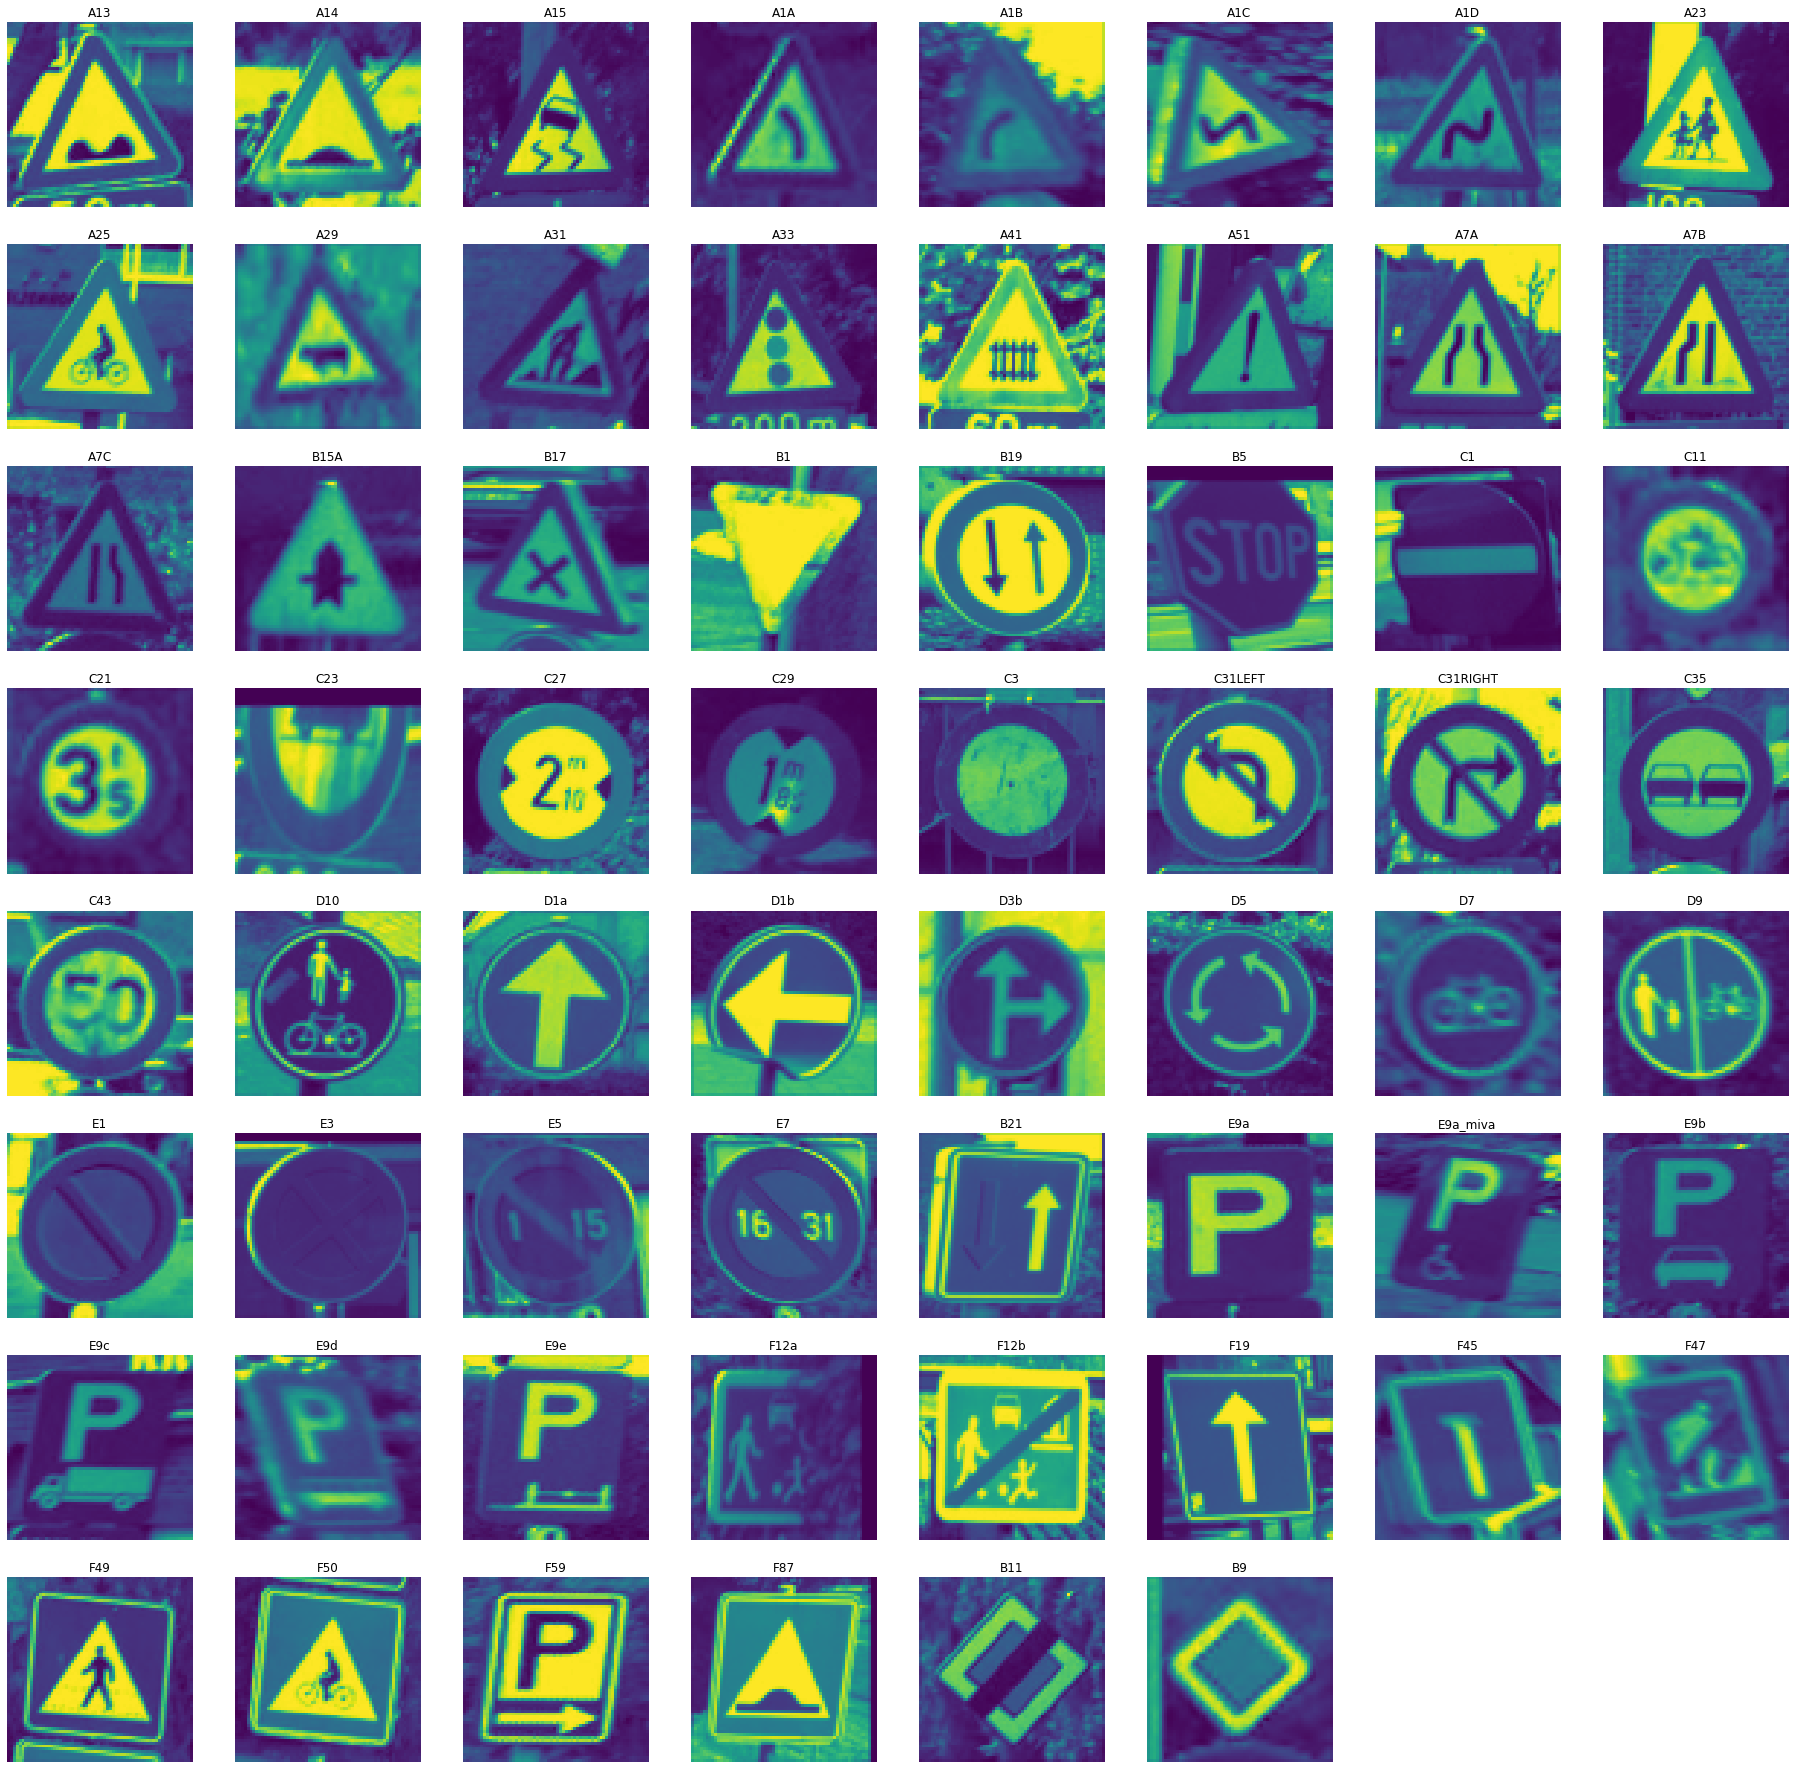

In [4]:
traffic.print_summary_dataset(images_train, labels_train, titles)

Signal:  A31


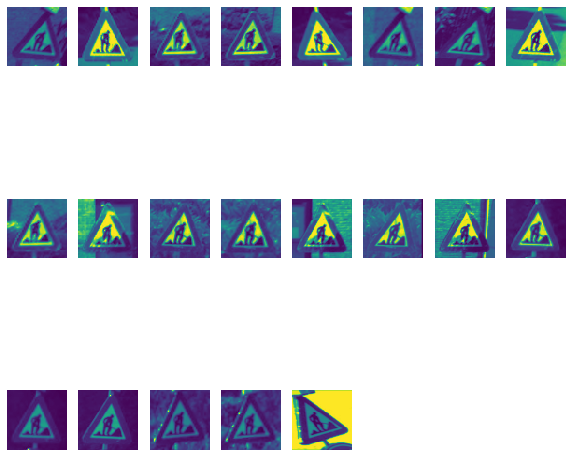

In [5]:
traffic.print_signals(10, images_train, labels_train, titles)

In [6]:
traffic.print_signals_attributes(10, images_train, labels_train, titles)

Signal:  A31
shape:  (64, 64) 	min: 0.07119056843348817 	max:  0.8444138641775234
shape:  (64, 64) 	min: 0.0757897706346537 	max:  0.9999984214974407
shape:  (64, 64) 	min: 0.0810162723386273 	max:  0.7385583086709786
shape:  (64, 64) 	min: 0.0746757549329036 	max:  0.779413426667588
shape:  (64, 64) 	min: 0.03908460533994093 	max:  0.9999536302239533
shape:  (64, 64) 	min: 0.09013919558057597 	max:  0.6983532050398296
shape:  (64, 64) 	min: 0.04797929041398517 	max:  0.7575448967657323
shape:  (64, 64) 	min: 0.11363563903494187 	max:  0.9999951098469267
shape:  (64, 64) 	min: 0.07665419268439777 	max:  0.7317439844228713
shape:  (64, 64) 	min: 0.04622254174671689 	max:  0.9999624135018614
shape:  (64, 64) 	min: 0.09026138437603998 	max:  0.7267406380456701
shape:  (64, 64) 	min: 0.10657425202567813 	max:  0.7553177768984263
shape:  (64, 64) 	min: 0.05630743684531164 	max:  0.9994308198688797
shape:  (64, 64) 	min: 0.0001100447015161935 	max:  0.6733553852206463
shape:  (64, 64) 	min: 

In [7]:
# Convertimos las imágenes en dos dimensiones
np_images_train = np_images_train.reshape(len(np_images_train), IMG_SHAPE_LEN)
np_images_test = np_images_test.reshape(len(np_images_test), IMG_SHAPE_LEN)
print("Nueva dimensión de imágenes: ", np_images_train.shape)

# Convertimos las labels de manera categórica
labels_categorical_train = keras.utils.to_categorical(np_labels_train)
labels_categorical_test = keras.utils.to_categorical(np_labels_test)

print("Ejemplo primera imagen de manera categórica: ", labels_categorical_train[0])

Nueva dimensión de imágenes:  (4575, 4096)
Ejemplo primera imagen de manera categórica:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# IMPLEMENTACIÓN RED NEURONAL
# En Keras la envoltura para cualquier red neuronal se crea con la clase Sequential
model = Sequential()

# Se deben de agregar capas a la red neuronal. Este ejemplo tendrá dos:
from keras.layers.core import Dense, Activation

# CAPA 1: Función de activación sigmoid
model.add(Dense(len(set(labels_train)), activation='selu', input_shape=(IMG_SHAPE_LEN,)))

# CAPA 2: Función de acivación softmax -> Devuelve una matrix de 10 valores con una probabilidad
# en cada posición.
model.add(Dense(len(set(labels_train)), activation='softmax'))

# Muestra la arquitectura de nuestra red neuronal
model.summary()

# Configurando el modelo de aprendizaje:
#  · loss, función para evaluar el grado de error entre salidas calculadas
#  · optimizador, función para calcular los pesos de los parámetros a partir de los datos de entrada
#  · metricas, para monitorizar el proceso de aprendizaje de la red.
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=['accuracy'])

# Entrenamiento del modelo
# - batch_size, indica el número de datos que se usan en cada actualización.
# - epochs, indica el número de veces que se usan todos los datos del proceso.
model.fit(np_images_train, labels_categorical_train, batch_size=32, epochs=30)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 62)                254014    
_________________________________________________________________
dense_2 (Dense)              (None, 62)                3906      
Total params: 257,920
Trainable params: 257,920
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
4575/4575 [==============================] - 1s 203us/step - loss: 3.0565 - acc: 0.3263
Epoch 2/30
4575/4575 [==============================] - 1s 133us/step - loss: 1.6819 - acc: 0.5851
Epoch 3/30
4575/4575 [==============================] - 1s 132us/step - loss: 1.1782 - acc: 0.6940
Epoch 4/30
4575/4575 [==============================] - 1s 130us/step - loss: 0.8828 - acc: 0.7604
Epoch 5/30
4575/

In [9]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(np_images_test, labels_categorical_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

y_pred = model.predict_classes(np_images_test)
acc = np.sum(y_pred == np_labels_test) / np.size(np_labels_test)
print("Test accuracy: {}".format(acc))

2520/2520 [==============================] - 0s 67us/step
Test loss: 0.6798687352769314
Test accuracy: 0.8742063493955703
Test accuracy: 0.8742063492063492
